## 1. 분석 준비

In [90]:
# 필요 라이브러리 import
import pandas as pd
import numpy as np
from glob import glob
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

#plt.rcParams['font.family'] = 'AppleGothic'
%config InlineBackend.figure_format = 'retina'
from datetime import datetime as df


In [91]:
# 파일 불러와서 file_name 변수에 저장
file_name = glob("*.csv")[:]
print(file_name)

['20221020133806_프랑스_방한 외래관광객 추이.csv', '20221020133819_필리핀_방한 외래관광객 추이.csv', '20221020133703_중국_방한 외래관광객 추이.csv', '20221020133841_홍콩_방한 외래관광객 추이.csv', '20221020133602_말레이시아_방한 외래관광객 추이.csv', '20221020133716_카자흐스탄_방한 외래관광객 추이.csv', '20221021012327_싱가포르_방한 외래관광객 추이.csv', '20221020133615_몽골_방한 외래관광객 추이.csv', '20221020133550_러시아_방한 외래관광객 추이.csv', '20221020132259_대만_방한 외래관광객 추이.csv', '20221021012338_베트남_방한 외래관광객 추이.csv', '20221020133741_태국_방한 외래관광객 추이.csv', '20221020133754_터키_방한 외래관광객 추이.csv', '20221020133652_일본_방한 외래관광객 추이.csv', '20221020133728_캐나다_방한 외래관광객 추이.csv', '20221020133535_독일_방한 외래관광객 추이.csv', '20221020133628_인도_방한 외래관광객 추이.csv', '20221020133641_인도네시아_방한 외래관광객 추이.csv', '20221020174756_미국_방한 외래관광객 추이.csv', '20221020133830_호주_방한 외래관광객 추이.csv', '20221021012304_영국_방한 외래관광객 추이.csv', '20221021012316_아랍에미리트_방한 외래관광객 추이.csv']


## 2. 데이터프레임 가공

In [92]:
# for문으로 파일명을 split하여 국가명 추출 > 데이터 프레임으로 변환
df_list = []
for f in file_name:
    if '_' in f:
        tmp_df = pd.read_csv(f, encoding="cp949")
        tmp_df['국가명'] = f.split('_')[1]
        df_list.append(tmp_df)

df = pd.concat(df_list)

In [93]:
# 연도별, 월별 데이터로 pivot
df = df.pivot(index = '기준연월', columns = '국가명', values='방한 외래관광객')
df = df.astype(int)

In [94]:
#인덱스 리셋
df_2 = df.reset_index().astype(int)
df_2.head(10)

국가명,기준연월,대만,러시아,미국,독일,말레이시아,몽골,베트남,싱가포르,아랍에미리트,...,일본,중국,카자흐스탄,캐나다,태국,터키,프랑스,필리핀,호주,홍콩
0,201801,75820,21934,59895,7328,22113,10793,16285,9664,599,...,167083,305127,3942,12417,44941,1934,5891,30454,11688,34671
1,201802,88076,20889,66049,9577,22529,8901,24508,9093,511,...,168241,345341,4687,16438,43428,1896,7277,27013,8769,50590
2,201803,94084,25733,80079,11239,37845,10664,37656,22182,1826,...,294476,403413,5475,18833,55735,2464,7102,41177,10693,62340
3,201804,105177,31313,89209,10924,41735,7607,50727,21130,886,...,213853,366604,4797,18569,64720,3329,10174,49053,15500,66533
4,201805,88304,26687,84601,9699,25422,7793,33676,19768,452,...,227230,370222,4638,18651,51866,2551,9390,42722,12472,57320
5,201806,102863,26796,94742,8424,27627,9123,48295,23117,642,...,235293,379891,4551,14521,41020,2499,7716,37554,11841,66136
6,201807,97696,28260,90270,9101,15694,9070,46310,11521,1375,...,230512,410337,4444,15002,33440,2683,9585,29237,11491,58373
7,201808,100517,23001,77319,10010,19218,10418,37085,11843,1245,...,315025,478140,4585,14686,28516,3197,10722,30459,11577,63397
8,201809,87351,23388,78826,10760,28613,11100,37481,15346,704,...,247847,434595,4327,15667,34298,2346,7944,33427,15310,49649
9,201810,99972,28153,98103,12635,40758,10729,55380,21787,1003,...,290468,475307,4768,20187,59941,2593,10813,52016,14907,61473


In [95]:
#기준 연월 melt
df_melt = df_2.melt(id_vars="기준연월")
df_melt.tail(10)

,기준연월,국가명,value
518,201903,홍콩,46068
519,201904,홍콩,76104
520,201905,홍콩,57026
521,201906,홍콩,61728
522,201907,홍콩,59036
523,201908,홍콩,65958
524,201909,홍콩,45911
525,201910,홍콩,65544
526,201911,홍콩,58600
527,201912,홍콩,71751


## 3. 시각화 ##

<AxesSubplot:xlabel='기준연월', ylabel='value'>

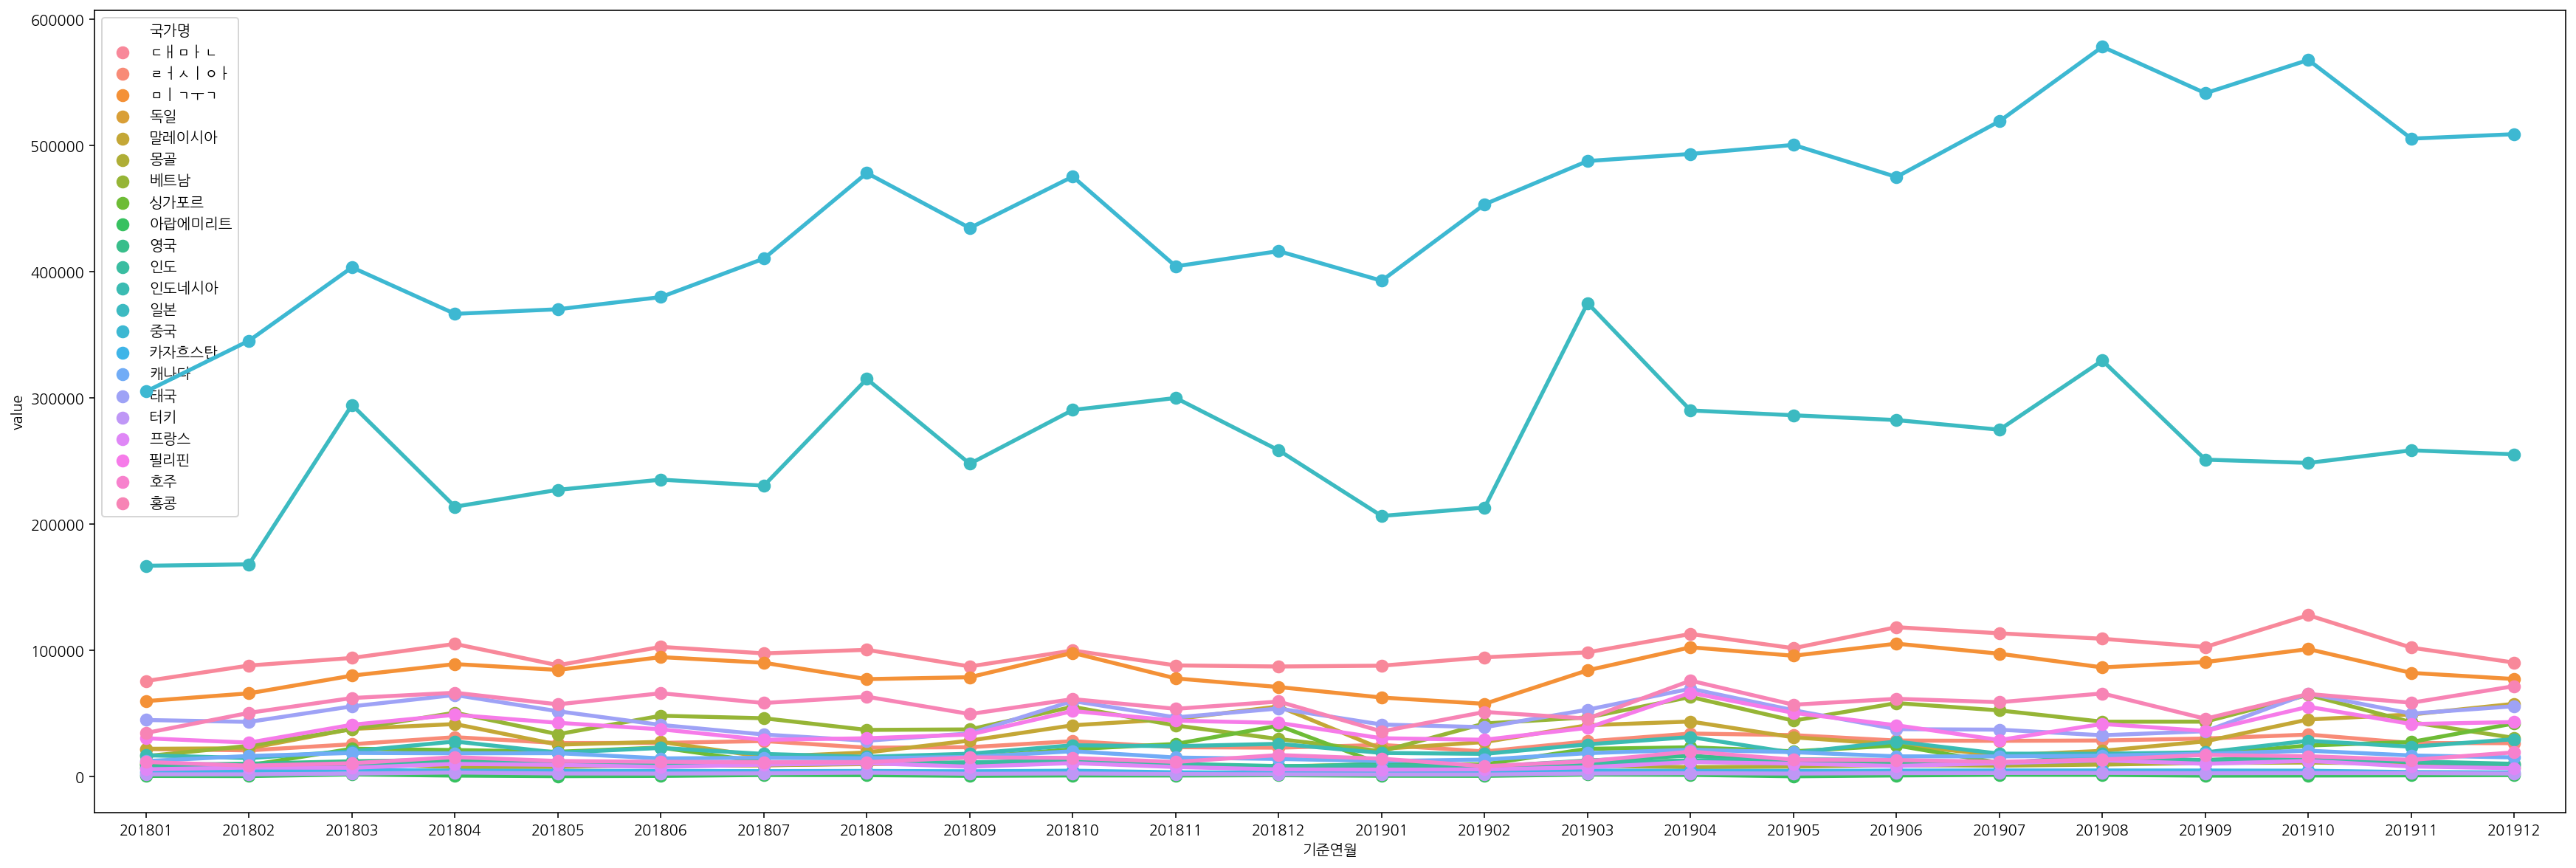

In [96]:
#기준 연월별 추이 확인
plt.figure(figsize=(30 ,10))
sns.pointplot(data=df_melt, x="기준연월", y="value", hue="국가명", ci=None)

### 분석: 반복되는 3월, 8월의 유입 관광객수 증가를 확인할 수 있다. ###

In [97]:
#18년도 10월에서 중국인 외래관광객의 도드라지는 추이 확인
tb_1810 = df.iloc[9:10]
tb_1810

국가명,대만,러시아,미국,독일,말레이시아,몽골,베트남,싱가포르,아랍에미리트,영국,...,일본,중국,카자흐스탄,캐나다,태국,터키,프랑스,필리핀,호주,홍콩
기준연월,,,,,,,,,,,,,,,,,,,,,
201810,99972,28153,98103,12635,40758,10729,55380,21787,1003,13813,...,290468,475307,4768,20187,59941,2593,10813,52016,14907,61473


In [98]:
#19년도 3월에서 일본인 외래관광객의 도드라지는 추이 확인
tb_1903 = df.iloc[13:16]
tb_1903

국가명,대만,러시아,미국,독일,말레이시아,몽골,베트남,싱가포르,아랍에미리트,영국,...,일본,중국,카자흐스탄,캐나다,태국,터키,프랑스,필리핀,호주,홍콩
기준연월,,,,,,,,,,,,,,,,,,,,,
201902,94559,20001,57732,6866,27484,9176,42181,9792,668,7876,...,213200,453379,3774,13551,39220,1765,5830,29294,8331,51312
201903,98510,27992,84275,11142,40789,8724,46991,22105,1732,12813,...,375119,487623,4915,18670,53100,2532,7469,38701,12263,46068
201904,113072,34205,102524,12873,43726,7582,63169,23307,1476,16707,...,290092,493250,4618,21361,69726,2826,11616,66525,19938,76104


In [ ]:
plt.figure(figsize=(10,3))
sns.violinplot(data=tb_1903, x="기준연월", y="value")

## 4. 전체 관광객 합계 구하기 (2018 - 2019년) ##

In [ ]:
df.columns

Index(['기준연월', '대만', '러시아', '미국', '독일', '말레이시아', '몽골', '베트남', '싱가포르',
       '아랍에미리트', '영국', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캐나다', '태국', '터키',
       '프랑스', '필리핀', '호주', '홍콩'],
      dtype='object', name='국가명')

In [ ]:
#nations = pd.DataFrame(df.loc['대만', '러시아', '미국', '독일', '말레이시아', '몽골', '베트남', '싱가포르', '아랍에미리트', '영국', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캐나다', '태국', '터키', '프랑스', '필리핀', '호주', '홍콩'])
nations = df[['대만', '러시아', '미국', '독일', '말레이시아', '몽골', '베트남', '싱가포르', '아랍에미리트', '영국', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캐나다', '태국', '터키', '프랑스', '필리핀', '호주', '홍콩']]
nations_sum = nations.sum().sort_values(ascending=False)
nations_sum = pd.DataFrame(nations_sum, columns = ["외래관광객수"])
nations_sum = nations_sum.reset_index()
nations_sum
#nations_sum.columns = ["국가명", "외래관광객수"]
#nations_sum
#nations_sum.to_csv("국가별_외래관광객수.csv")

,국가명,외래관광객수
0,중국,10812533
1,일본,6220233
2,대만,2375826
3,미국,2012030
4,홍콩,1378752
5,태국,1130522
6,베트남,1011549
7,필리핀,964035
8,말레이시아,791519
9,러시아,645599


<AxesSubplot:xlabel='국가명', ylabel='외래관광객수'>

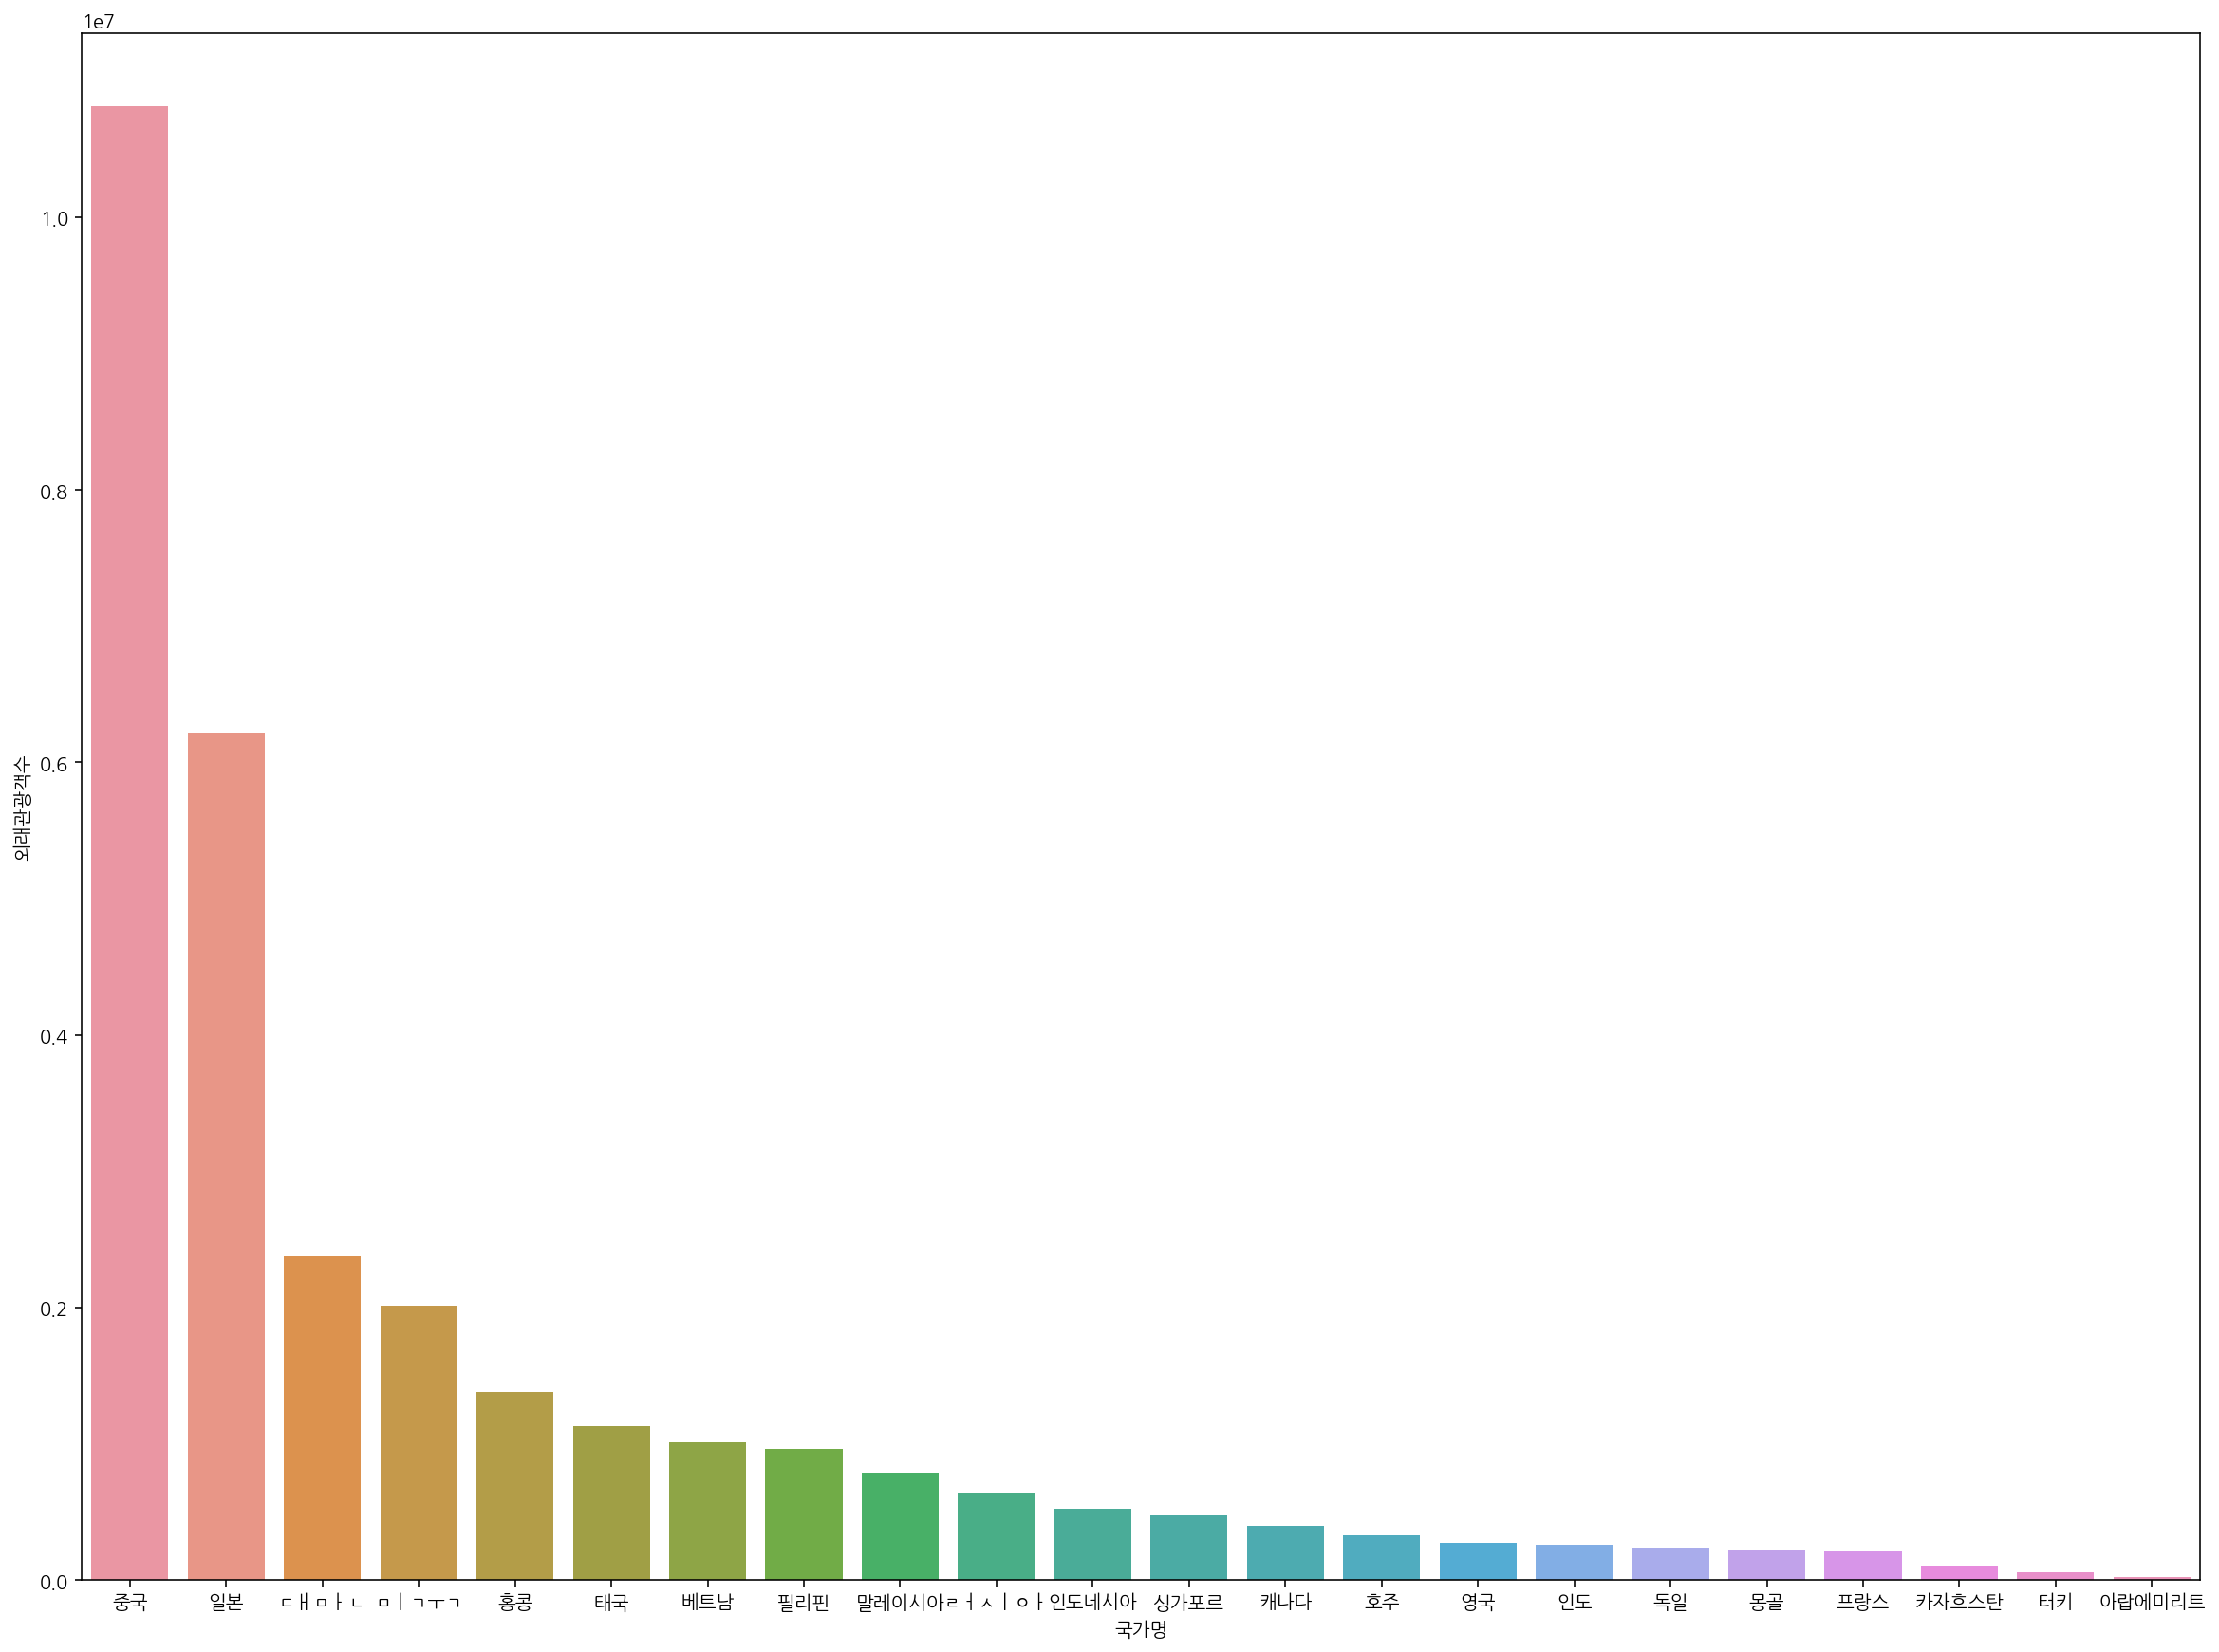

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(data=nations_sum, x="국가명", y="외래관광객수")

In [ ]:
#nations = pd.DataFrame(df.loc['대만', '러시아', '미국', '독일', '말레이시아', '몽골', '베트남', '싱가포르', '아랍에미리트', '영국', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캐나다', '태국', '터키', '프랑스', '필리핀', '호주', '홍콩'])
nations = df[['대만', '러시아', '미국', '독일', '말레이시아', '몽골', '베트남', '싱가포르', '아랍에미리트', '영국', '인도', '인도네시아', '일본', '중국', '카자흐스탄', '캐나다', '태국', '터키', '프랑스', '필리핀', '호주', '홍콩']]
nations_sum = nations.sum().sort_values(ascending=False)
nations_sum = pd.DataFrame(nations_sum, columns = ["외래관광객수"])
nations_sum = nations_sum.reset_index()
nations_sum

,국가명,외래관광객수
0,중국,10812533
1,일본,6220233
2,대만,2375826
3,미국,2012030
4,홍콩,1378752
5,태국,1130522
6,베트남,1011549
7,필리핀,964035
8,말레이시아,791519
9,러시아,645599


## 4. 나라별 추이 그래프 구하기 ##

In [ ]:
asia = df[["기준연월", "중국", "일본", "홍콩", "태국", "베트남", "필리핀"]]
asia = asia.melt(id_vars="기준연월")
asia

,기준연월,국가명,value
0,201801,중국,305127
1,201802,중국,345341
2,201803,중국,403413
3,201804,중국,366604
4,201805,중국,370222
...,...,...,...
139,201908,필리핀,41817
140,201909,필리핀,36252
141,201910,필리핀,55394
142,201911,필리핀,41739


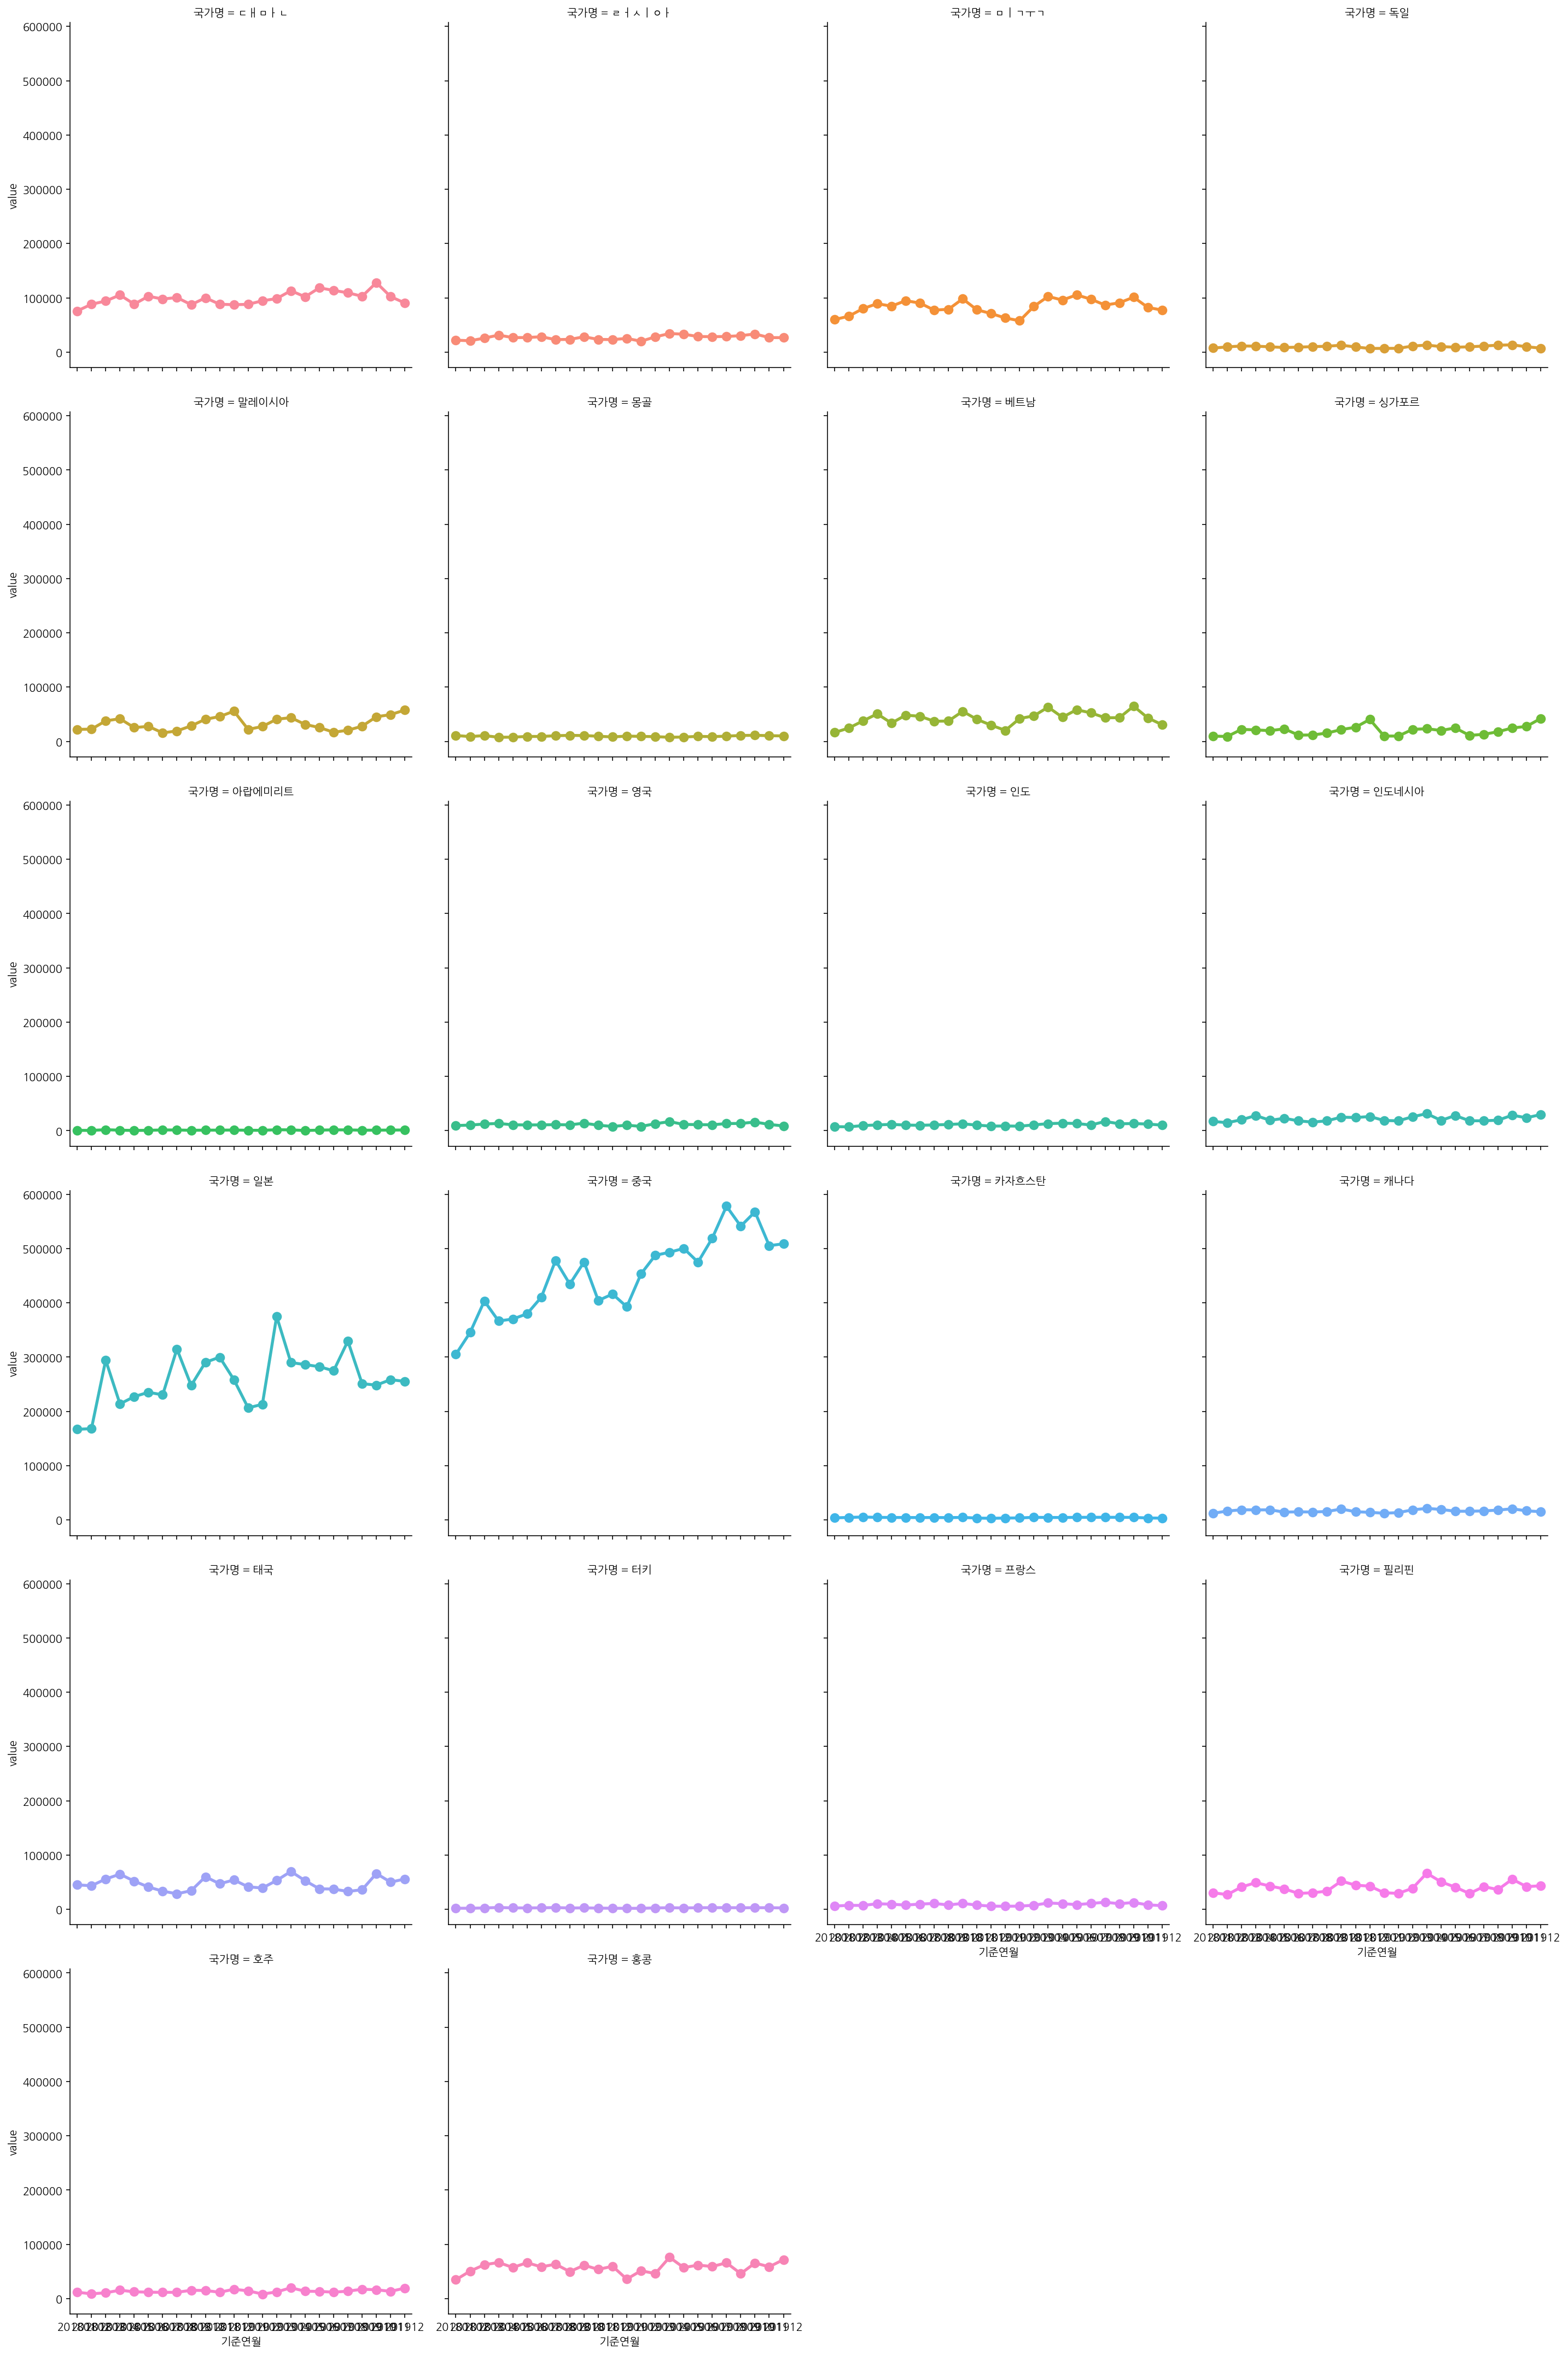

In [ ]:
sns.catplot(data=df_melt, x="기준연월", y="value",col="국가명", col_wrap=4, kind="point", hue="국가명")

In [ ]:
#추후 추가될 전처리 대비하여 연도/월 슬라이싱
df["연도"] = df["기준연월"].astype("string").str[0:4]
df["월"] = df["기준연월"].astype("string").str[-2:]

df.head(24)

국가명,기준연월,대만,러시아,미국,독일,말레이시아,몽골,베트남,싱가포르,아랍에미리트,...,카자흐스탄,캐나다,태국,터키,프랑스,필리핀,호주,홍콩,연도,월
0,201801,75820,21934,59895,7328,22113,10793,16285,9664,599,...,3942,12417,44941,1934,5891,30454,11688,34671,2018,01
1,201802,88076,20889,66049,9577,22529,8901,24508,9093,511,...,4687,16438,43428,1896,7277,27013,8769,50590,2018,02
2,201803,94084,25733,80079,11239,37845,10664,37656,22182,1826,...,5475,18833,55735,2464,7102,41177,10693,62340,2018,03
3,201804,105177,31313,89209,10924,41735,7607,50727,21130,886,...,4797,18569,64720,3329,10174,49053,15500,66533,2018,04
4,201805,88304,26687,84601,9699,25422,7793,33676,19768,452,...,4638,18651,51866,2551,9390,42722,12472,57320,2018,05
5,201806,102863,26796,94742,8424,27627,9123,48295,23117,642,...,4551,14521,41020,2499,7716,37554,11841,66136,2018,06
6,201807,97696,28260,90270,9101,15694,9070,46310,11521,1375,...,4444,15002,33440,2683,9585,29237,11491,58373,2018,07
7,201808,100517,23001,77319,10010,19218,10418,37085,11843,1245,...,4585,14686,28516,3197,10722,30459,11577,63397,2018,08
8,201809,87351,23388,78826,10760,28613,11100,37481,15346,704,...,4327,15667,34298,2346,7944,33427,15310,49649,2018,09
9,201810,99972,28153,98103,12635,40758,10729,55380,21787,1003,...,4768,20187,59941,2593,10813,52016,14907,61473,2018,10
